Statistics Practical Implementation
Measure Of Central Tendency
1.Mean
2.Median
3.Mode

In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

In [2]:
import numpy as np
print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [3]:
import statistics
print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [4]:
import statistics
statistics.mode(ages)

32

<Axes: >

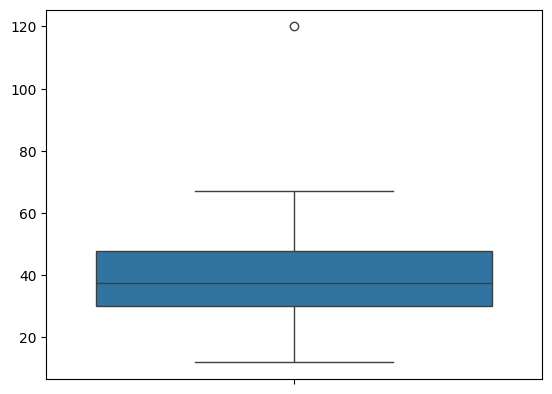

In [5]:
import seaborn as sns
sns.boxplot(ages)

In [6]:
# 5 number summary

import numpy as np
q1,q3=np.percentile(ages,[25,75])


In [7]:
print(q1,q3)

30.0 47.75


In [8]:
## to check outlier[lower fence - higher fence]
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


Measure of Dispersion
1.Variance
2.Standard Devition

In [9]:
statistics.variance(ages)#sample

795.2954545454545

In [10]:
np.var(ages,axis=0) #poplation

729.0208333333334

In [11]:
def variance(data):
  n=len(ages)
  mean=sum(data)/n
  deviation=[(x - mean)**2 for x in data]
  variance=sum(deviation)/n ### poplation variances
  return variance

In [12]:
variance(ages)

729.0208333333334

In [13]:
def variance(data,dof=0):
  n=len(ages)
  mean=sum(data)/n
  deviation=[(x - mean)**2 for x in data]
  variance=sum(deviation)/(n-dof)
  return variance

In [14]:
variance(ages,dof=1)

795.2954545454545

In [15]:
def variance(data):
  n=len(ages)
  mean=sum(data)/n
  deviation=[(x - mean)**2 for x in data]
  variance=sum(deviation)/(n-1)
  return variance

In [17]:
variance(ages)

795.2954545454545

In [18]:
statistics.pvariance(ages)

729.0208333333334

In [19]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

Histograms And PDF

<Axes: ylabel='Count'>

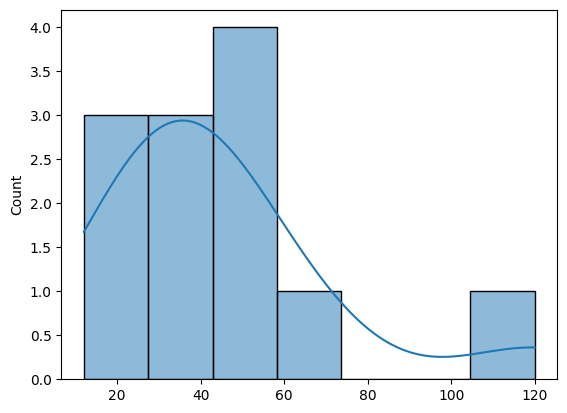

In [20]:
import seaborn as sns
sns.histplot(ages,kde=True)

In [21]:
df=sns.load_dataset('iris')

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

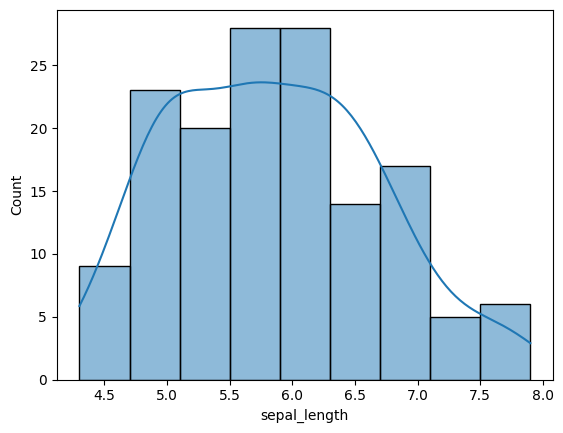

In [23]:
sns.histplot(df['sepal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

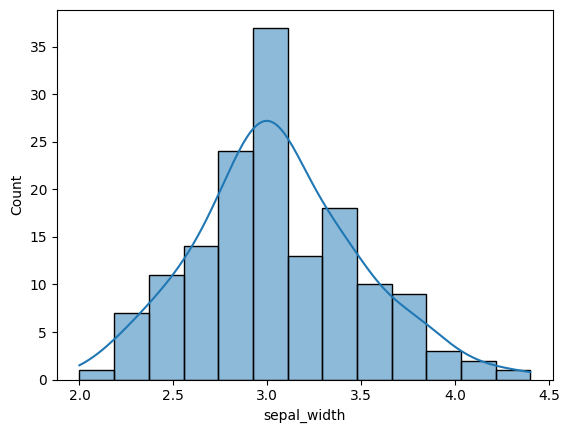

In [25]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

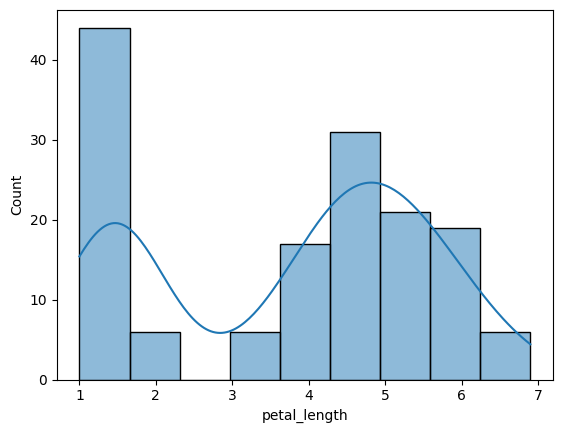

In [27]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

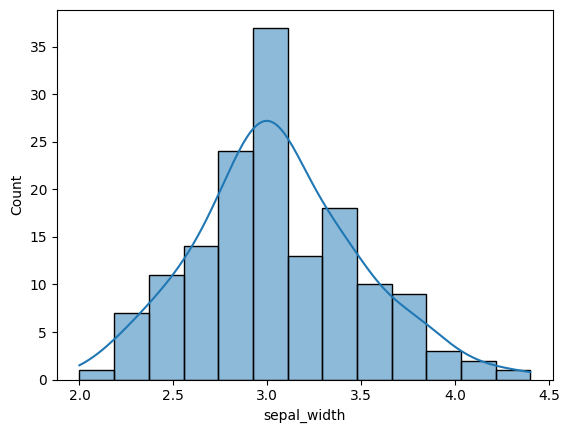

In [28]:
sns.histplot(df['sepal_width'],kde=True)

In [29]:
##create a normal distributed data

s=np.random.normal(0.5,0.2,1000)

<Axes: ylabel='Count'>

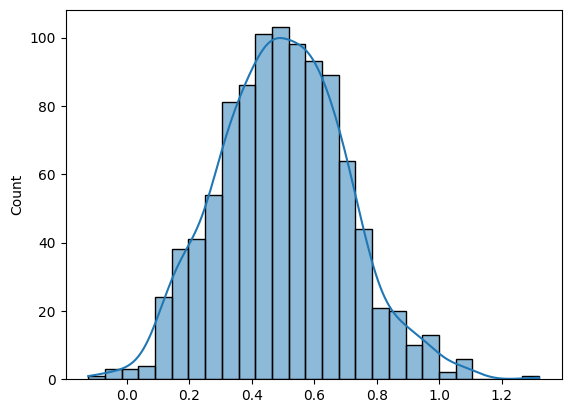

In [30]:
sns.histplot(s,kde=True)

Log Normal Distribution,Power Law Distribution

In [31]:
mu, sigma = 3.,1. #mean and standard deviation
s = np.random.lognormal(mu,sigma,100)

<Axes: ylabel='Count'>

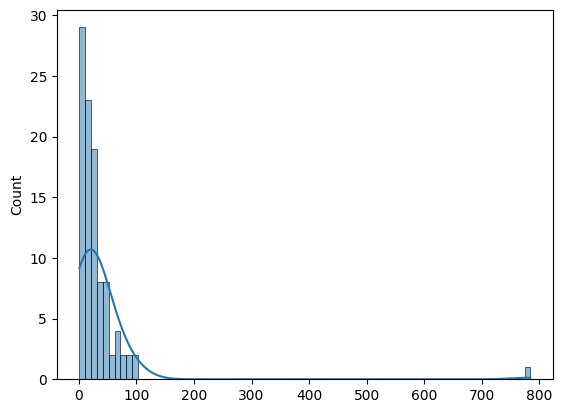

In [32]:
sns.histplot(s,kde=True)

<Axes: ylabel='Count'>

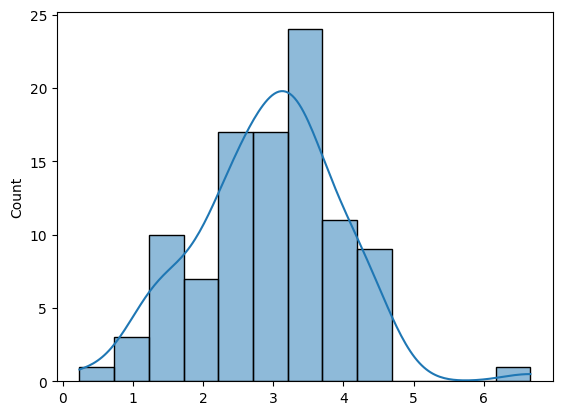

In [35]:
sns.histplot(np.log(s),kde=True)

Check Whether Disstribution is Normal Distribution

In [36]:
#### if you want to check whethr feature is guassian or normal distributed
### Q-Q plot

import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab

def plot_data(sample):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(sample)
  plt.subplot(1,2,2)
  stat.probplot(sample,dist='norm',plot=pylab)
  plt.show()

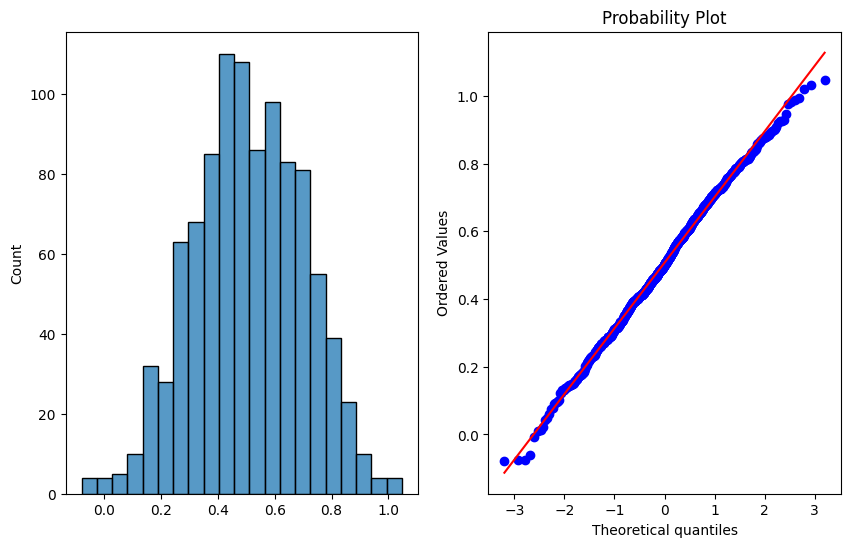

In [38]:
## create a normal diatributed data

s=np.random.normal(0.5,0.2,1000)
plot_data(s)

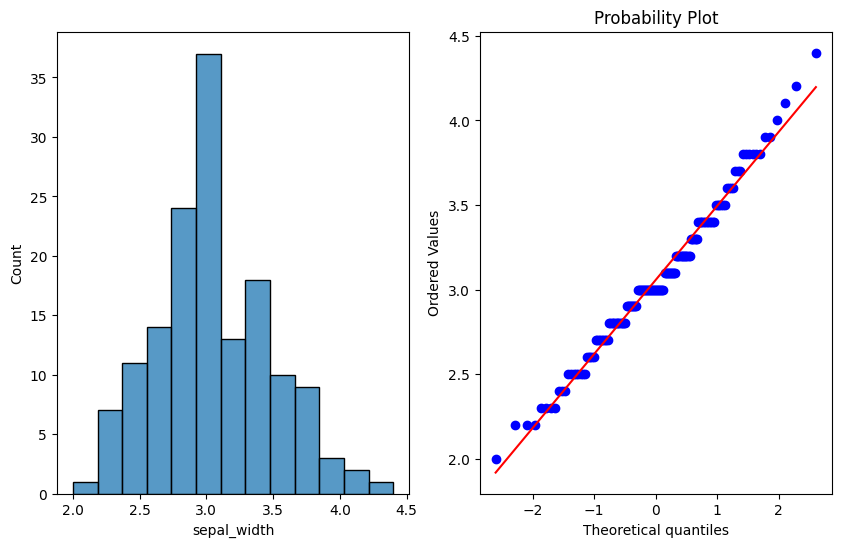

In [39]:
plot_data(df['sepal_width'])

In [40]:
mu, sigma =3.,1. #mean and standard deviation
sample = np.random.lognormal(mu,sigma,100)

In [41]:
def plot_data_log(sample):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(sample)
  plt.subplot(1,2,2)
  stat.probplot(np.log(sample),dist='norm',plot=pylab)
  plt.show()

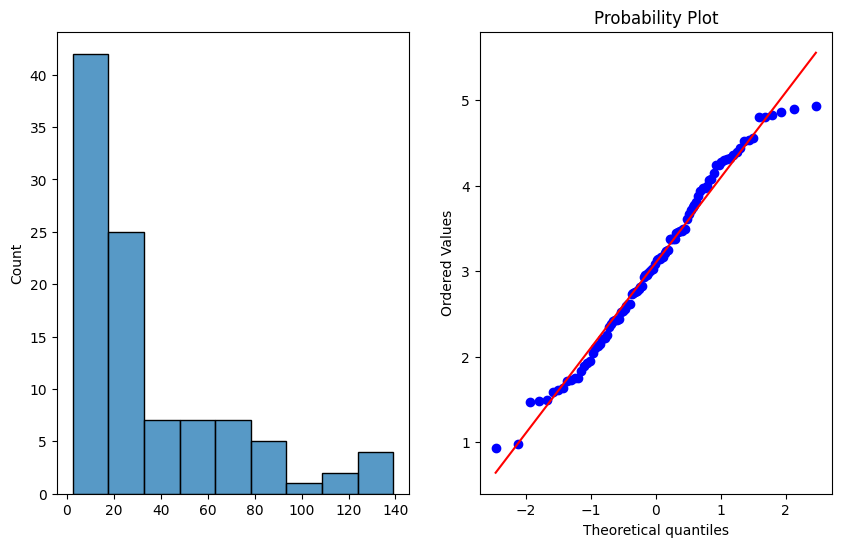

In [42]:
plot_data_log(sample)

Pearson And Sperman Rank Correlation

In [44]:
df=sns.load_dataset('tips')

In [45]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
import pandas as pd

In [47]:
df.corr()

<ipython-input-47-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


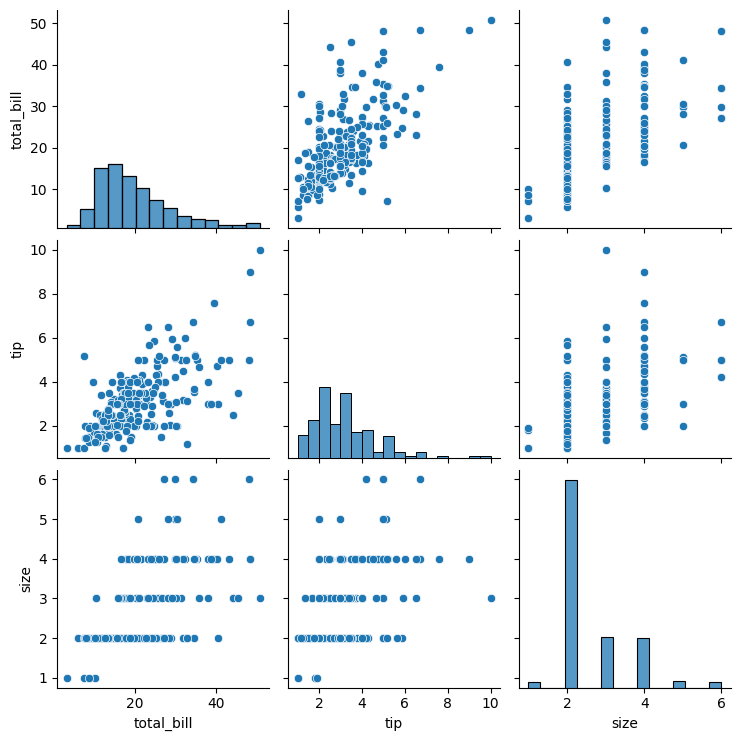

In [48]:
sns.pairplot(df)